https://www.kaggle.com/choihanbin/titanic-survival-prediction-eda-ensemble#2.-Feature-Engineering

## EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

### EDA란?
- 본격적인 데이터 분석에 앞서 데이터의 시각화를 통해 데이터에 대한 이해하는 과정을 의미합니다.
- 의미없는 데이터를 학습시킨다면 정확하지 못한 결과가 나올 수 있습니다.
- 데이터 시각화를 통해 데이터를 이해하고 올바른 학습하는 것이 중요합니다.

### matplotlib
- 파이썬에서 가장 널리 사용되는 대표적인 시각화 라이브러리입니다.
- figure: subplot을 포함할 수 있는 전체 영역
    - figure()
- subplot: 실제로 그래프를 그리는 영역
    - add_subplot(행, 열, 번호)
    - subplots(행, 열) -> figure와 axes 전달
- plot: 그래프를 그리는 함수
    - plot()
- legend: 범례나 레이블 등 추가정보를 포함해 작성
    - legend()

### seaborn
- matplotlib을 기반으로 다양한 색상과 차트 등의 기능을 추가한 시각화 라이브러리입니다.

In [ ]:
# matplotlib가 없을 시 설치 진행
!pip install matplotlib

### Checking featuring

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 셀 아래에 그래프 출력하도록 지원
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

In [7]:
# 데이터 불러오기
train = pd.read_csv('./data/titanic.csv')
# 데이터 상위 5개 불러오기
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 변수 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Feature 타입 정리
##### Input Feature
- 분류형 변수: Name, Sex, Ticket, Cabin, Embarked
- 순서가 있는 변수: Pclass
- 정수형 변수: PassengerId, Age, SibSp, Parch, Fare

##### Target Feature
- Survived

In [15]:
# 상관관계 표
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


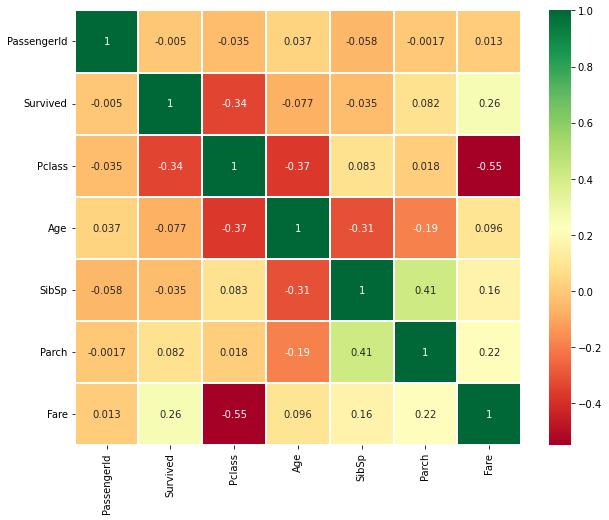

In [14]:
# 상관관계 그래프
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### 상관관계를 통해 도출한 내용
- Fare, Pclass는 음의 상관관계가 있다. Pclass 1이 2, 3보다 높은 등급이기에 가격이 더 비싼 것으로 추측할 수 있다.
- Survived와 Pclass는 음의 상관관계가 있다. -> 체크
- Age과 Pclass는 음의 상관관계가 있다. Pclass는 Survived와 음의 상관관계가 있는데 Age는 Survived와 상관관계가 없다. -> 체크
- SibSp는 Parch와 양의 상관관계가 있다. 가족이 많이 탑승했기에 그랬을 것이라 추측한다.
- Fare와 Survived, Parch와 Fare에는 상관관계가 있다.

1. Sex와 Survived의 그래프

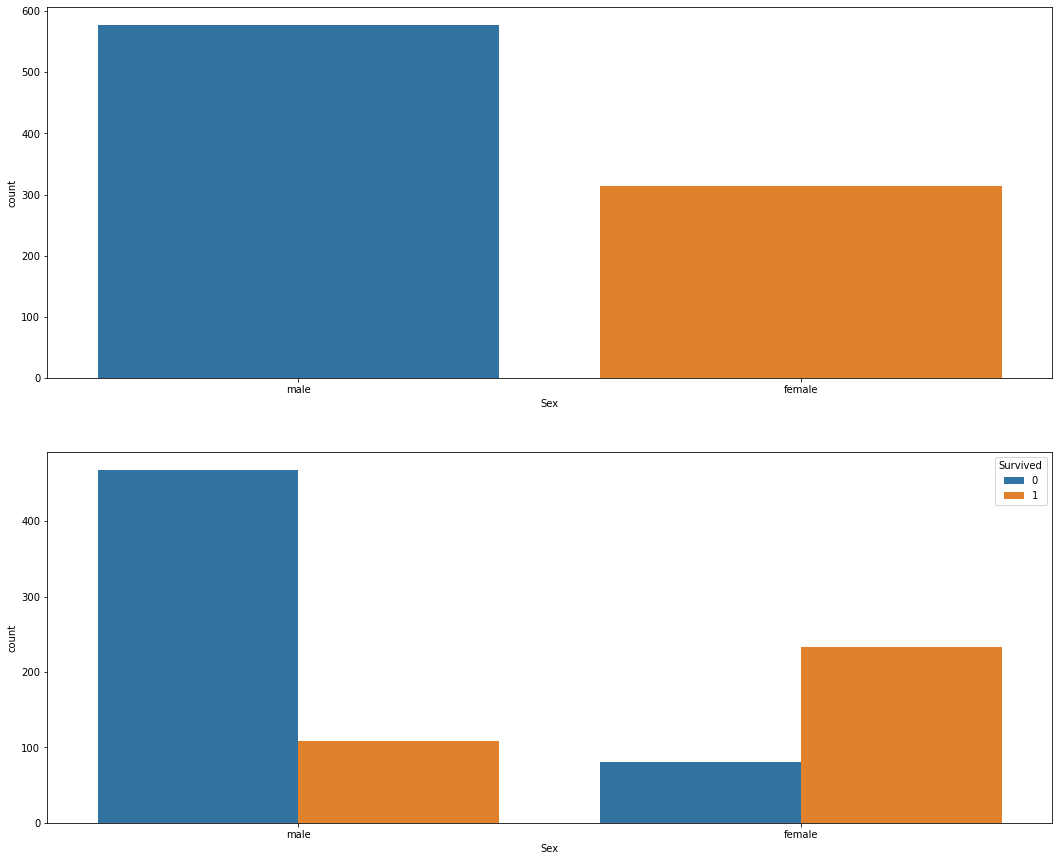

In [22]:
# 그래프 그리기
fig, ax = plt.subplots(2, figsize= (18, 15))
sns.countplot('Sex', data=train, ax=ax[0])
sns.countplot('Sex', data=train, ax=ax[1], hue = 'Survived')
plt.show()

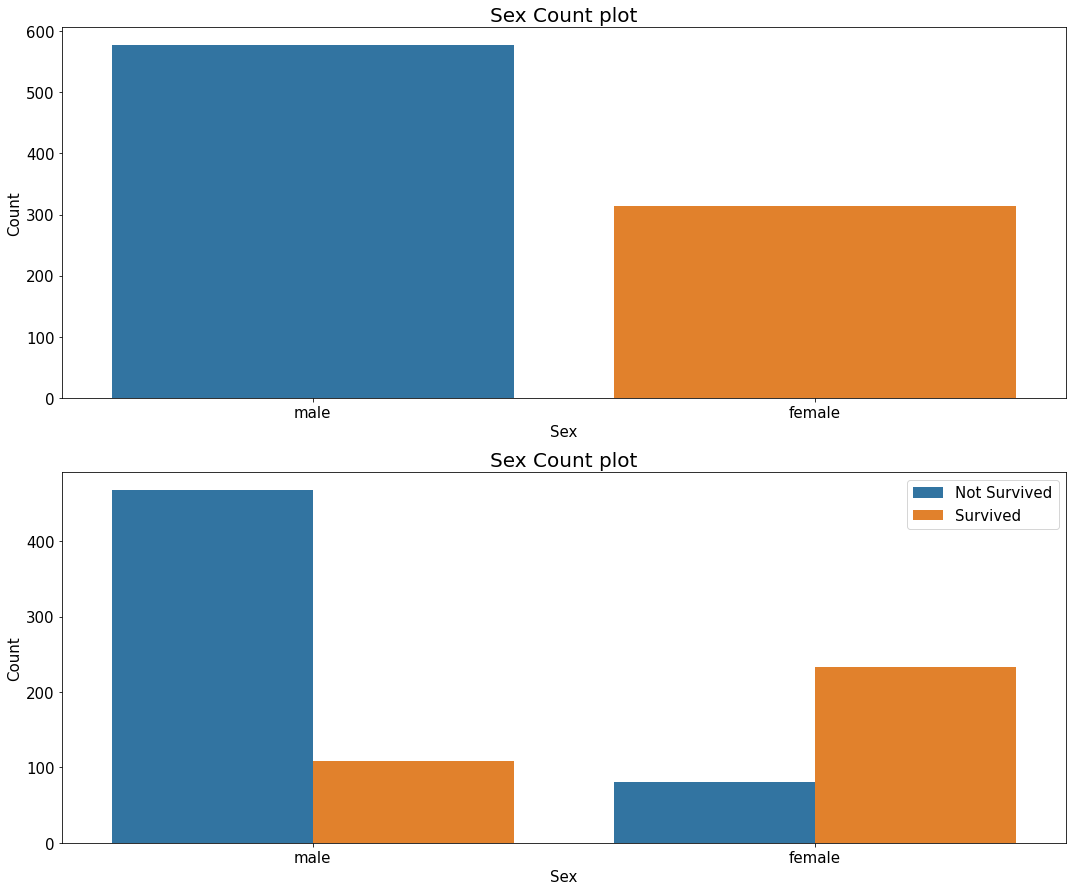

In [34]:
fig, ax = plt.subplots(2, figsize= (18, 15))
sns.countplot('Sex', data=train, ax=ax[0])
# 제목 작성 및 라벨 크기 키우기
ax[0].set_title(f"{'Sex'} Count plot", size=20)
ax[0].set_xlabel('Sex', size = 15)
ax[0].set_ylabel('Count', size = 15)
ax[0].tick_params(labelsize = 15)


sns.countplot('Sex', data=train, ax=ax[1], hue = 'Survived')
ax[1].set_title(f"{'Sex'} Count plot", size=20)
ax[1].set_xlabel('Sex', size = 15)
ax[1].set_ylabel('Count', size = 15)
ax[1].tick_params(labelsize = 15)
ax[1].legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})

plt.show()

### 함수로 그래프 작성하기
- 반복적인 작업을 할 때 모든 코드를 작성하는 것보다 함수로 작성하는 것이 좋습니다.


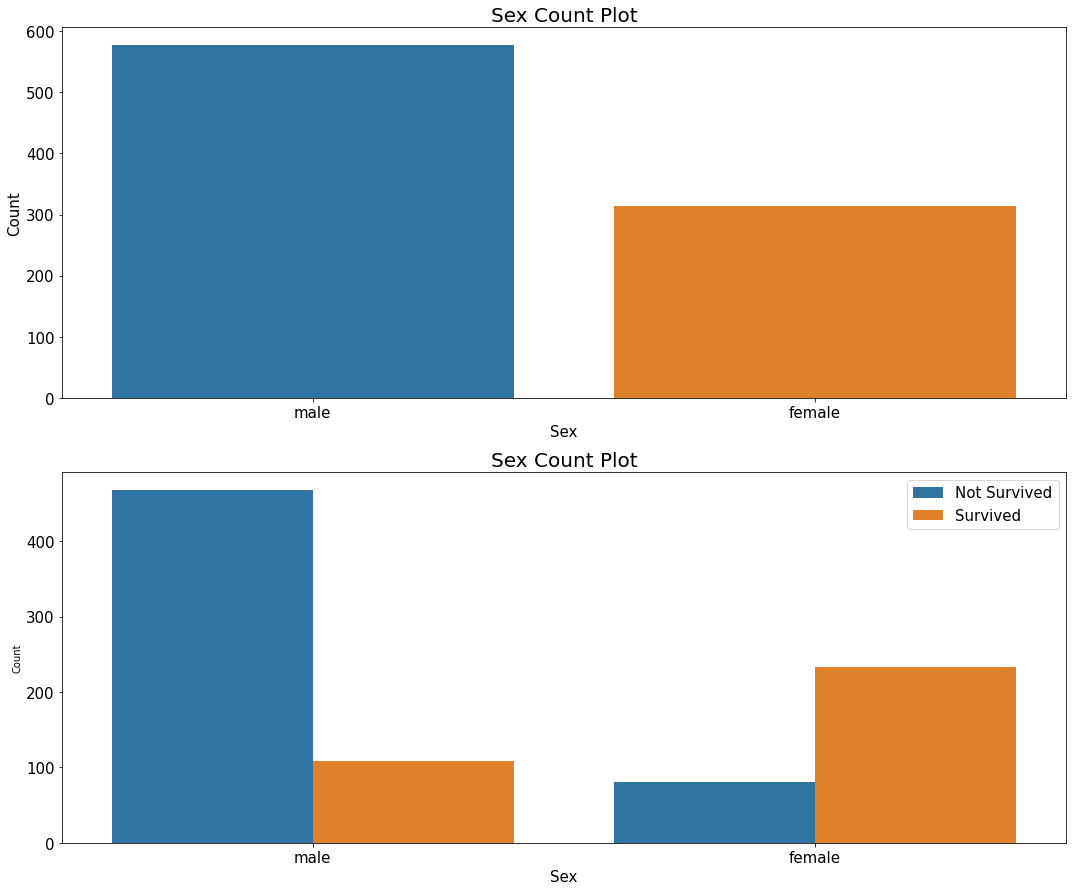

In [35]:
def count_subplots(data, feature1, hue = 'Survived', ylim = None, xlim = None):
    f, ax = plt.subplots(2, figsize = (18, 15))
    sns.countplot(feature1,  data = data, ax = ax[0])
    ax[0].set_title('{} Count Plot'.format(feature1), size = 20)
    ax[0].set_xlabel(feature1, size = 15)
    ax[0].set_ylabel('Count', size = 15)
    ax[0].tick_params(labelsize = 15)
    
    sns.countplot(feature1, hue = hue, data = data, ax = ax[1])
    ax[1].set_title('{} Count Plot'.format(feature1), size = 20)
    ax[1].set_xlabel(feature1, size = 15)
    ax[1].set_ylabel('Count')
    ax[1].tick_params(labelsize = 15)
    if hue == 'Survived':
        ax[1].legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size' : 15})
        
    if ylim != None:
        plt.ylim(ylim)
    if xlim != None:
        plt.xlim(xlim)    
    
    plt.show()

count_subplots(train, 'Sex')

##### 남자의 인원수가 훨씬 높음에도 남자의 생존률이 매우 낮다. 여자는 대부분이 생존했다.

2. Pclass와 Survived의 그래프

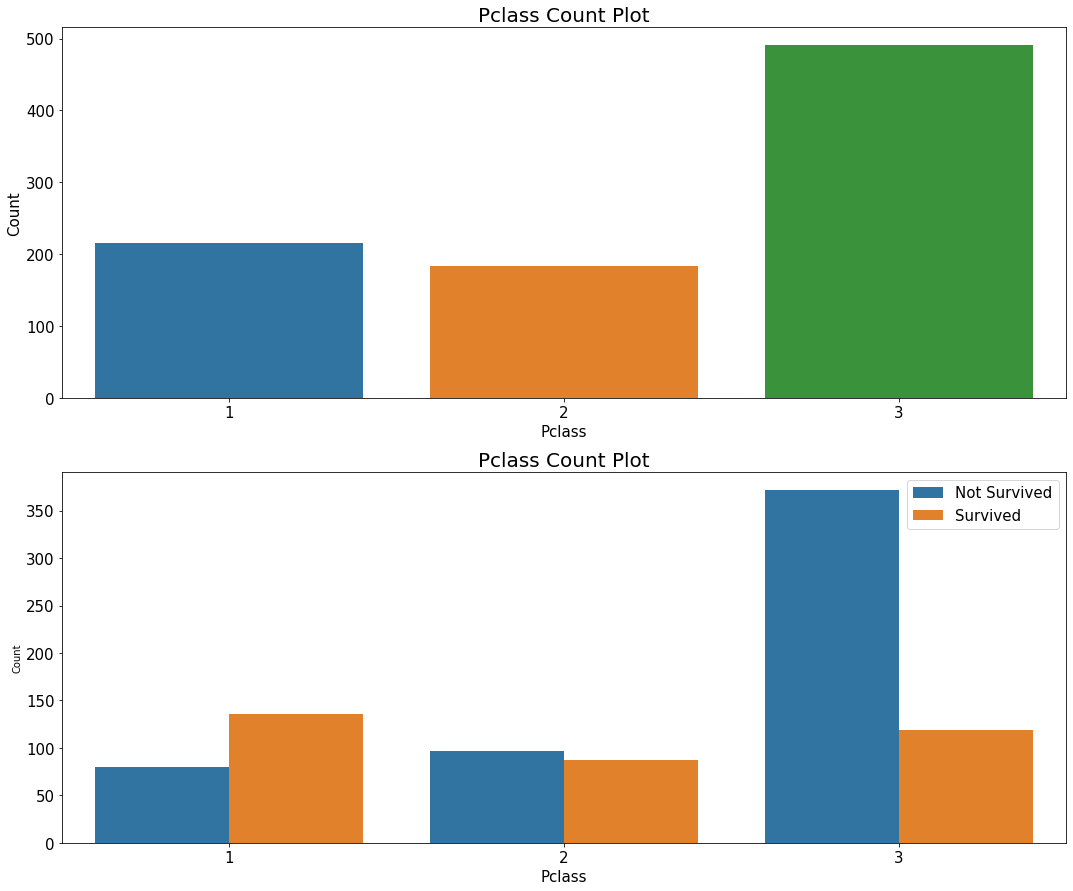

In [36]:
count_subplots(train, 'Pclass')

##### 1등급석에서 머문 탑승객은 대부분 살아남았고, 2등급석은 절반 가량, 3등급석은 대부분 살아남지 못했다.

3. SibSp와 Survived의 그래프

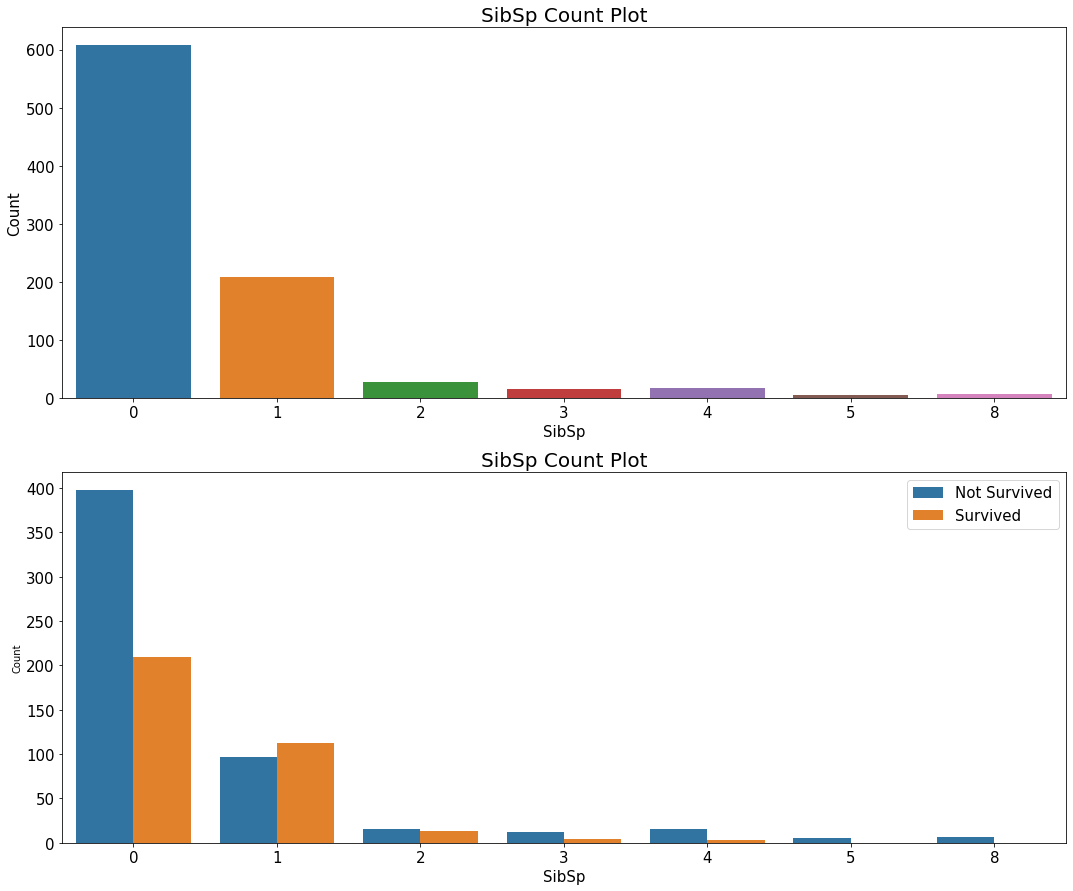

In [38]:
count_subplots(train, 'SibSp')

4. Parch와 Survived의 그래프

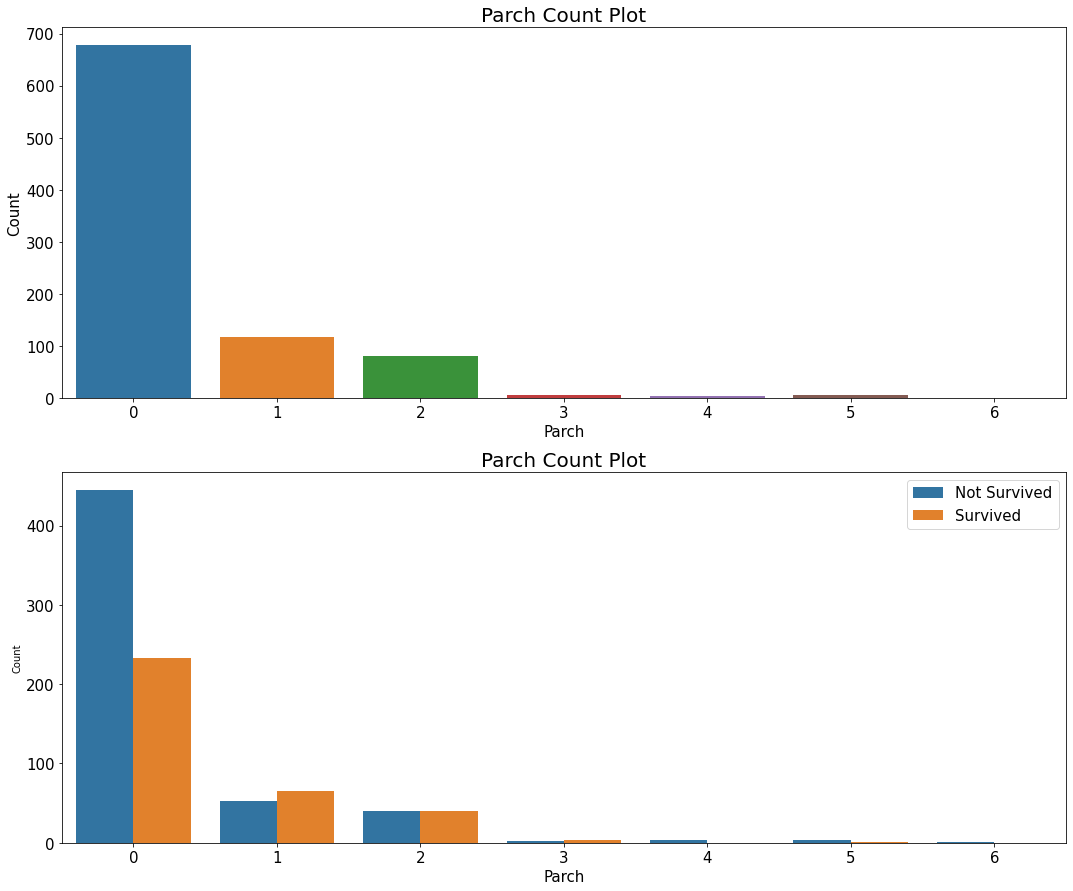

In [39]:
count_subplots(train, 'Parch')

##### SibSp와 Parch의 그래프가 비슷하고 1 이상인 경우 생존률이 높다는 것을 확인할 수 있다. 즉, 가족 단위로 타이타닉에 탑승한 경우에는 생존률이 더 높다는 것을 확인할 수 있다.

5. Embarked와 Survived의 그래프

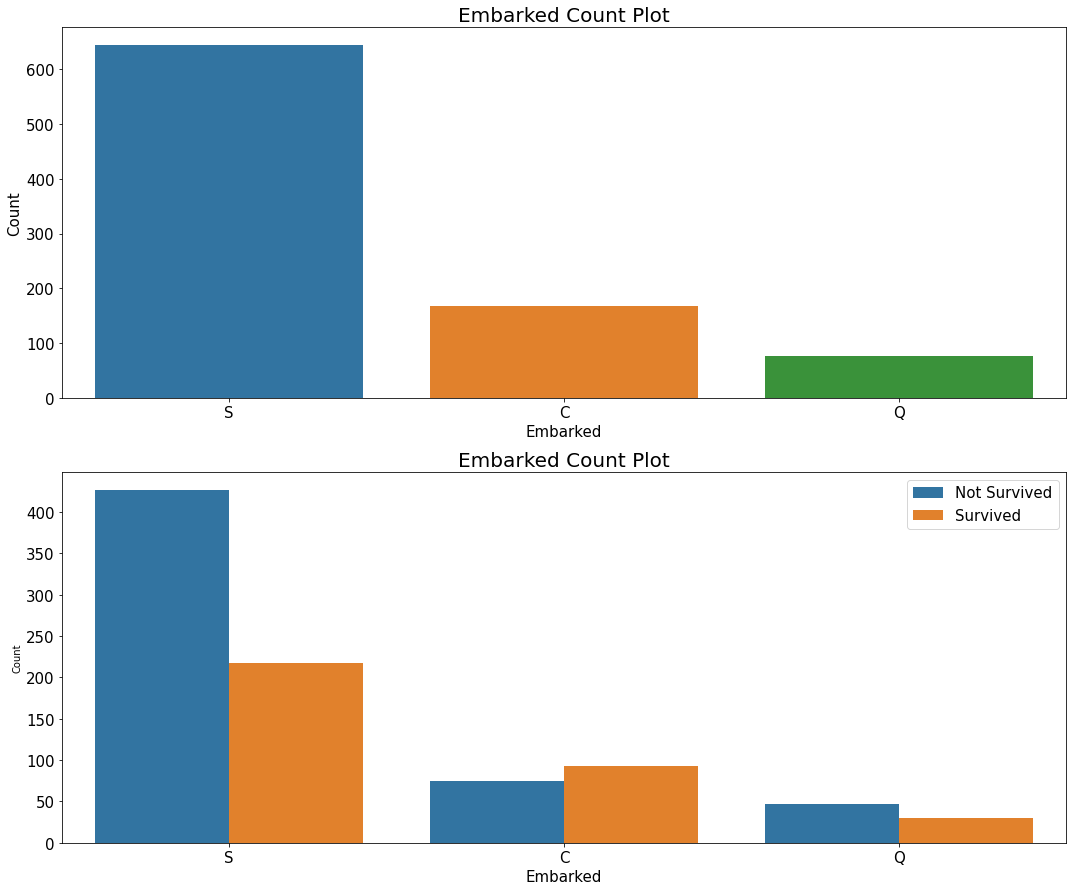

In [40]:
count_subplots(train, 'Embarked')

##### Embarked를 보았을 때 Cherbourg에서 탑승한 경우 생존률이 높다는 것을 확인할 수 있다. 
why?
- 도시마다 소득격차가 존재하진 않을까? -> Cherbourg에서 탑승한 사람들이 1등급석 자리를 가진 비율이 많지는 않을까?

6. Embarked와 Survived, Pclass의 그래프

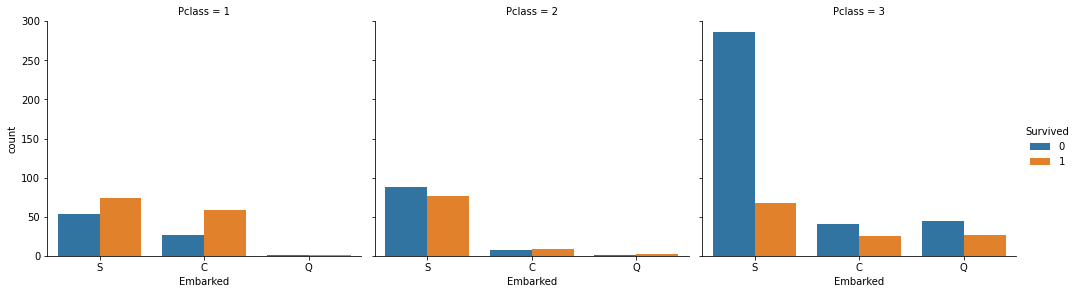

In [42]:
def factor_plots(data, feature1, feature2 = None, col = None, hue = None, kind = 'point', ylim = None, xlim = None):
        g = sns.factorplot(feature1, feature2, col = col, hue = hue, kind = kind, data = data)
        fig = plt.gcf()
        fig.set_size_inches(15, 4)
        
        if ylim != None:
            plt.ylim(ylim)
        if xlim != None:
            plt.xlim(xlim)
            
        plt.show()

factor_plots(train, 'Embarked',  kind = 'count', hue = 'Survived', col = 'Pclass')

##### Cherbourg에서 탑승한 사람들이 1등급 자리를 많이 가졌다.

7. Pclass와 Survived, Sex의 그래프

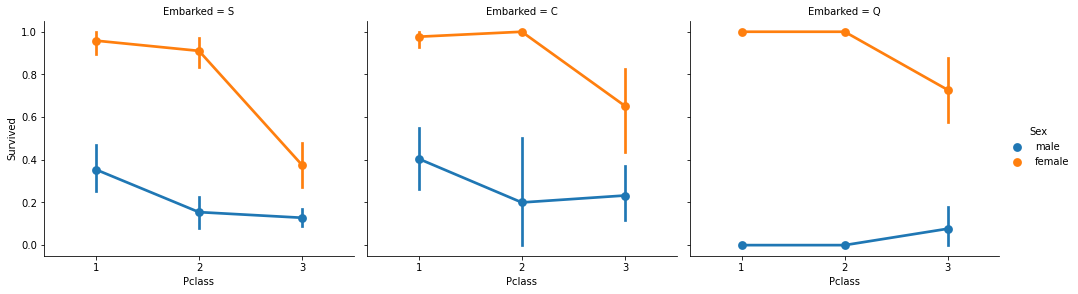

In [43]:
factor_plots(train, 'Pclass', 'Survived', hue = 'Sex',  kind = 'point', col = 'Embarked')

##### 1등급 석에 머문 경우 생존률이 높지만 Queenstown에서 탑승한 남성의 경우 대부분의 생존률이 높지 않다. 또한 남성과 여성의 생존률 차이도 확인할 수 있다.

8. Age, Sex, Survived의 그래프

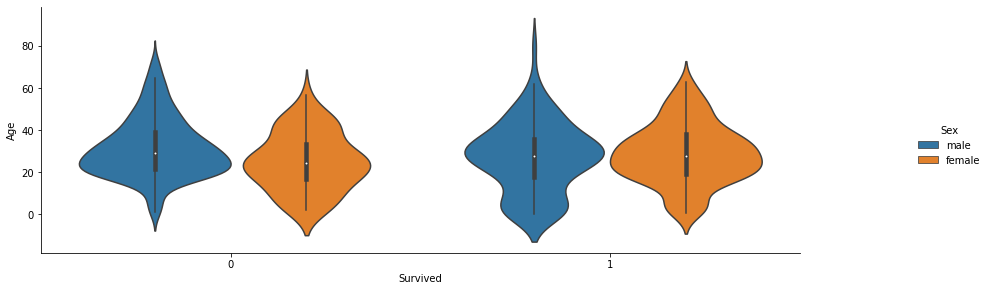

In [46]:
factor_plots(train, 'Survived', 'Age', hue = 'Sex', kind = 'violin')

##### 상관관계 맵에서는 나이와 생존과 관계가 없었지만 매우 어린 나이대의 사람들은 대부분 생존한 것을 확인할 수 있다. 특히 나이가 매우 어린 경우에는 남여 구분없이 생존했다.

9. Fare와 Pclass, Survived 그래프

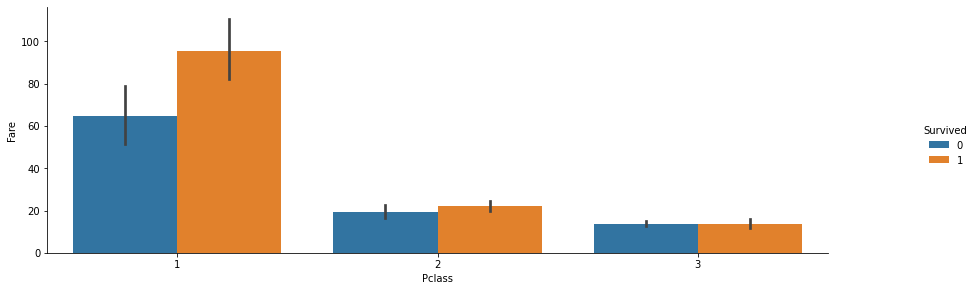

In [49]:
factor_plots(train, 'Pclass', 'Fare', hue = 'Survived', kind = 'bar')

##### Fare가 비쌀수록 높은 좌석 등급에 앉는다는 것과 더 높은 비용을 지불한 사람들의 생존률이 높다는 것을 확인할 수 있다.